In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ttvfaster import run_ttvfaster

import pandas as pd

%matplotlib inline

import os
import numpy as np
import pylab as pl
from scipy import optimize

import corner
import radvel
import radvel.likelihood
from radvel.plot import orbit_plots, mcmc_plots
from radvel.kepler import rv_drive
from radvel.utils import semi_amplitude
from radvel.orbit import timeperi_to_timetrans, timetrans_to_timeperi

In accordance with NEP 32, the function fv was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
In accordance with NEP 32, the function ipmt was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
In accordance with NEP 32, the function irr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
In accordance with NEP 32, the function mirr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
In accordance with NEP 32, the function nper was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financia

In [2]:
radvel.utils.semi_amplitude(5.9, 7.13, 1, 0, Msini_units='earth')

1.9602615596224104

In [3]:
rv_data = np.genfromtxt('ck00115_rv.txt', delimiter = '\t', dtype = 'str', skip_header=1, skip_footer = 1) 

In [4]:
t = rv_data[:,3]
t = np.array([float(i) for i in t])
t

array([2457197.948219, 2457200.991239, 2457202.062219, 2457204.037027,
       2457222.06666 , 2457229.095178, 2457229.900375, 2457236.943638,
       2457245.979016, 2457254.93196 , 2457255.995104, 2457262.890422,
       2457265.012706, 2458627.914381, 2458679.988635, 2458714.842907,
       2458722.907216, 2458765.847403, 2458776.858662, 2458795.779808,
       2458999.960787, 2459003.060371, 2459003.971311, 2459006.950713,
       2459007.993173, 2459010.998866, 2459011.985675, 2459012.983941,
       2459014.048065, 2459016.916247, 2459024.926903, 2459028.860562,
       2459030.954948, 2459035.972648, 2459040.000646, 2459071.053519,
       2459078.03372 , 2459088.889249, 2459091.966282, 2459101.920248,
       2459114.882941, 2459117.819583, 2459119.838001, 2459120.820908,
       2459121.879195, 2459122.889507, 2459123.838387, 2459153.804096,
       2459362.071766, 2459373.881189, 2459376.952544, 2459377.907244,
       2459378.938855, 2459379.962735, 2459383.035088, 2459385.946136,
      

In [5]:
rv = rv_data[:,4]
rv = np.array([float(i) for i in rv])

In [6]:
errvel = rv_data[:,5]
errvel  = np.array([float(i) for i in errvel])
errvel

array([3.02884912, 2.74477863, 2.56869888, 2.83422017, 3.12488151,
       3.20139027, 2.93574619, 3.42841554, 2.79062462, 2.84704351,
       3.34349418, 2.79039574, 3.16380644, 2.60883498, 2.33465457,
       2.43416739, 2.34678197, 2.81228304, 3.5979948 , 2.93089199,
       2.90895653, 3.14411783, 2.53519416, 2.837466  , 3.01606941,
       2.77401733, 2.87451267, 3.18386531, 2.71713066, 3.08728242,
       2.99333024, 2.63937378, 2.97662807, 3.01568604, 2.71730423,
       4.11360168, 2.99127626, 3.41172266, 3.3353231 , 2.93525934,
       2.90168643, 2.8636601 , 3.16233373, 2.92622209, 2.85621905,
       2.98835897, 3.19803715, 3.33947539, 2.57118058, 2.82829595,
       2.94227862, 2.90216708, 2.47345304, 2.67346215, 2.78410912,
       2.53167009, 2.76671243, 3.25443649, 2.74543858, 3.00467992,
       2.98698902, 2.86678362, 2.41566896, 2.90619588, 2.70797348,
       2.76199317, 3.19969368, 3.75582671, 3.20264077, 2.61996126,
       3.23983622, 2.89675617, 2.56999159, 2.81184077, 3.45725

In [7]:
# reading data in (cont)
transit_data_b = pd.read_csv('rowe_ttvs_b.csv') # data from Jason Rowe
transit_data_b  = pd.DataFrame.to_numpy(ttv_data_b)

transit_data_c = pd.read_csv('rowe_ttvs_c.csv') 
transit_data_c = pd.DataFrame.to_numpy(ttv_data_c)

observed_b = transit_data_b[:,0] + transit_data_b[:,1]
observed_c = transit_data_c[:,0] + transit_data_c[:,1]

unc_b = transit_data_b[:,2]
unc_c = transit_data_c[:,2]

transit_num_b = transit_data_b[:,3]
transit_num_c = transit_data_c[:,3]

transit_num_c

array([  0,   1,   2,   3,   4,   5,   7,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  20,  21,  22,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  59,  60,  61,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128,
       129, 130, 131, 132, 134, 135, 137, 138, 139, 140, 141, 142, 143,
       144, 146, 147, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       176, 177, 178, 179, 180, 182, 183, 185, 186, 187, 188, 192, 193,
       194, 195, 196, 197, 198, 200, 201, 202, 203, 204])

In [8]:
def gaussian_penalty(x,mean,variance):
    return -0.5 * ((x-mean)**2/variance) - 0.5*np.log(2*np.pi*variance)

def lnprob(theta):
    lp = lnprior(theta)    
    if not np.isfinite(lp):
        return -np.inf

    return lp + lnlike(theta)
    
def lnprior(theta):
    stellar_mass, \
    mass_b, p_b, secosw_b, sesinw_b, t0_b, \
    mass_c, p_c, secosw_c, sesinw_c, t0_c, \
    gamma, jitter = theta
    
    solar_to_earth_mass = 332496
    
    mpms_b = mass_b/(stellar_mass * solar_to_earth_mass) 
    mpms_c = mass_c/(stellar_mass * solar_to_earth_mass) 
    
    e_b = secosw_b**2 + sesinw_b**2
    e_c = secosw_c**2 + sesinw_c**2
    a_b = ((stellar_mass * (p_b/365.24)**2))**(1./3)
    a_c = ((stellar_mass * (p_c/365.24)**2))**(1./3)
    rh_b = a_b*(1-e_b)*((mpms_b/3)**(1./3))
    rh_c = a_c*(1-e_c)*((mpms_c/3)**(1./3))
    apo_b = a_b*(1+e_b)
    apo_c = a_c*(1+e_c)
    peri_b = a_b*(1-e_b)
    peri_c = a_c*(1-e_c)
    
    if  (0 > apo_b + max(rh_b, rh_c)) or (apo_b + max(rh_b, rh_c) > peri_c): # prevents orbit/hill sphere crossing
          return -np.inf
            
    if  (0.8 < stellar_mass < 1.2) & \
        (0 < mass_b < 100) & (0 < mass_c < 100) & \
        (0 <= secosw_b**2 + sesinw_b**2 < 1) & \
        (0 <= secosw_c**2 + sesinw_c**2 < 1) & \
        (-10 < gamma < 10) & (0 < jitter < 10):
            return gaussian_penalty(stellar_mass, 0.991, 0.032**2) + gaussian_penalty(p_b, 5.412207130,0.000002488**2) \
            + gaussian_penalty(p_c, 7.125945910, 0.000012500**2)
    
    return -np.inf

def ttv_model(theta):
    stellar_mass, \
    mass_b, p_b, secosw_b, sesinw_b, t0_b, \
    mass_c, p_c, secosw_c, sesinw_c, t0_c, _ , _ = theta
    
    solar_to_earth_mass = 332496
    
    mpms_b = mass_b/(stellar_mass * solar_to_earth_mass) 
    mpms_c = mass_c/(stellar_mass * solar_to_earth_mass) 
    
    i_b = np.pi/2 
    i_c = np.pi/2 
    
    omega_b = -np.pi/2
    omega_c = -np.pi/2
    
    e_b = secosw_b**2 + sesinw_b**2
    e_c = secosw_c**2 + sesinw_c**2

    om_b = np.arctan2(sesinw_b,secosw_b)
    om_c = np.arctan2(sesinw_c,secosw_c)
    
    ecosw_b = e_b * np.cos(om_b)
    ecosw_c = e_c * np.cos(om_c)
    
    esinw_b = e_b * np.sin(om_b)
    esinw_c = e_c * np.sin(om_c)
    
    params = stellar_mass, \
    mpms_b, p_b, ecosw_b, i_b, omega_b, esinw_b, t0_b, \
    mpms_c, p_c, ecosw_c, i_c, omega_c, esinw_c, t0_c
    
    [b,c] = run_ttvfaster(2, params, 0.0, 1700.0, 10)
    return [b,c]

def ttv_lnlike(theta):
    [b,c] = ttv_model(theta)
    calc_b = b[transit_num_b]
    calc_c = c[transit_num_c]
    
    chi2_b = sum(((observed_b - calc_b)/(unc_b))**2)
    chi2_c = sum(((observed_c - calc_c)/(unc_c))**2)  
    
    chi2 = chi2_b + chi2_c
    
    if np.isnan(chi2):
        import pdb; pdb.set_trace()
        
    return -0.5*chi2

# watch for t_p versus t_0 and omega_p vs omega_star 
def rv_model(theta):
    stellar_mass, \
    mass_b, p_b, secosw_b, sesinw_b, t0_b, \
    mass_c, p_c, secosw_c, sesinw_c, t0_c, \
    gamma, jitter = theta
    
    e_b = secosw_b**2 + sesinw_b**2
    e_c = secosw_c**2 + sesinw_c**2
    
    w_b = np.arctan2(sesinw_b, secosw_b)# radians
    w_c = np.arctan2(sesinw_c, secosw_c)
    
    k_b = semi_amplitude(mass_b, p_b, stellar_mass, e_b, Msini_units='earth') 
    k_c = semi_amplitude(mass_c, p_c, stellar_mass, e_c, Msini_units='earth')    
    
    tp_b = timetrans_to_timeperi(t0_b, p_b, e_b, w_b)
    tp_c = timetrans_to_timeperi(t0_c, p_c, e_c, w_c)
    
    orbel_b = [p_b, tp_b, e_b, w_b, k_b]
    orbel_c = [p_c, tp_c, e_c, w_c, k_c]
    
    b = rv_drive(t,orbel_b, use_c_kepler_solver=True)
    c = rv_drive(t,orbel_c, use_c_kepler_solver=True)
    
    return b + c + gamma 

def rv_lnlike(theta):
    _, \
    _, _, _, _, _, \
    _, _, _, _, _, \
    _, jitter = theta
    
    calc_rv = rv_model(theta)
    rv_unc = np.sqrt(errvel**2 + jitter**2) 
    
    chi2 = sum(((rv - calc_rv)**2 /((rv_unc)**2)) + np.log(rv_unc**2))
    
    return -0.5*chi2
    
def lnlike(theta):
    return ttv_lnlike(theta) + rv_lnlike(theta)

In [9]:
theta2 = [ 1.00086937e+00,  1.18913905e+01,  5.41220290e+00,  2.82556008e-01, \
        2.20532444e-02,  5.53186574e+01,  6.04141827e+00,  7.12592314e+00, \
        2.60246839e-01, -2.03306098e-02,  5.77541742e+01, -4.63838538e-01, \
        5.09252187e+00] # from previous mcmc run

lnprob(theta2)

-518.4883383028983

In [10]:
import emcee
nwalkers = 2*len(theta2)
ndim = len(theta2)
p0 = (theta2 + np.random.randn(nwalkers, ndim)*1e-7)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(p0, 800000,progress=True)

100%|██████████| 800000/800000 [9:45:19<00:00, 22.78it/s]   


State([[ 9.86980114e-01  1.25253200e+01  5.41220331e+00  6.80580999e-02
   3.11328297e-02  5.53185729e+01  4.69212158e+00  7.12592308e+00
   4.50882665e-02 -8.23417622e-02  5.77543509e+01 -1.10973861e+00
   4.96198844e+00]
 [ 9.70384349e-01  1.01622344e+01  5.41220338e+00 -1.81345870e-01
   2.86141241e-02  5.53187233e+01  5.40235064e+00  7.12592253e+00
  -1.69736758e-01 -2.84016249e-02  5.77540539e+01  3.37122132e-02
   4.77677492e+00]
 [ 9.97898364e-01  1.03294960e+01  5.41220346e+00 -2.95842815e-02
   6.56946468e-02  5.53187001e+01  6.41653804e+00  7.12592437e+00
  -3.23975079e-02 -7.44483488e-02  5.77536772e+01 -6.70567779e-01
   4.04542392e+00]
 [ 9.63520774e-01  1.05189193e+01  5.41220334e+00 -1.11397798e-01
  -1.64583270e-01  5.53184446e+01  7.37864241e+00  7.12592272e+00
  -9.41728635e-02 -1.87009090e-01  5.77553784e+01  3.97057608e-01
   4.47043411e+00]
 [ 1.02831504e+00  9.18745337e+00  5.41220295e+00 -7.37451714e-02
  -8.74314452e-02  5.53187169e+01  6.26107935e+00  7.1259429

In [11]:
tau = sampler.get_autocorr_time(tol=0)
converged = np.all(tau * 100 < sampler.iteration)
print(converged) # simple check for convergence add G-R for final MCMC when you figure out bimodality issue.  

True


In [12]:
import corner
flat_samples = sampler.get_chain(discard=200000, flat=True)

labels = ['stellar_mass',
    'mass_b', 'p_b', 'secosw_b', 'sesinw_b', 't0_b', 
    'mass_c', 'p_c', 'secosw_c', 'sesinw_c', 't0_c', 'gamma', 'jitter']

In [13]:
from emcee import EnsembleSampler
logprobs = EnsembleSampler.get_log_prob(sampler,discard = 200000, flat = True)
ind = np.where(logprobs == max(logprobs))[0][0]
lnprob(flat_samples[ind]) == max(logprobs)
best_params = flat_samples[ind]
best_params

np.median(flat_samples[:,2])

5.412203470371295

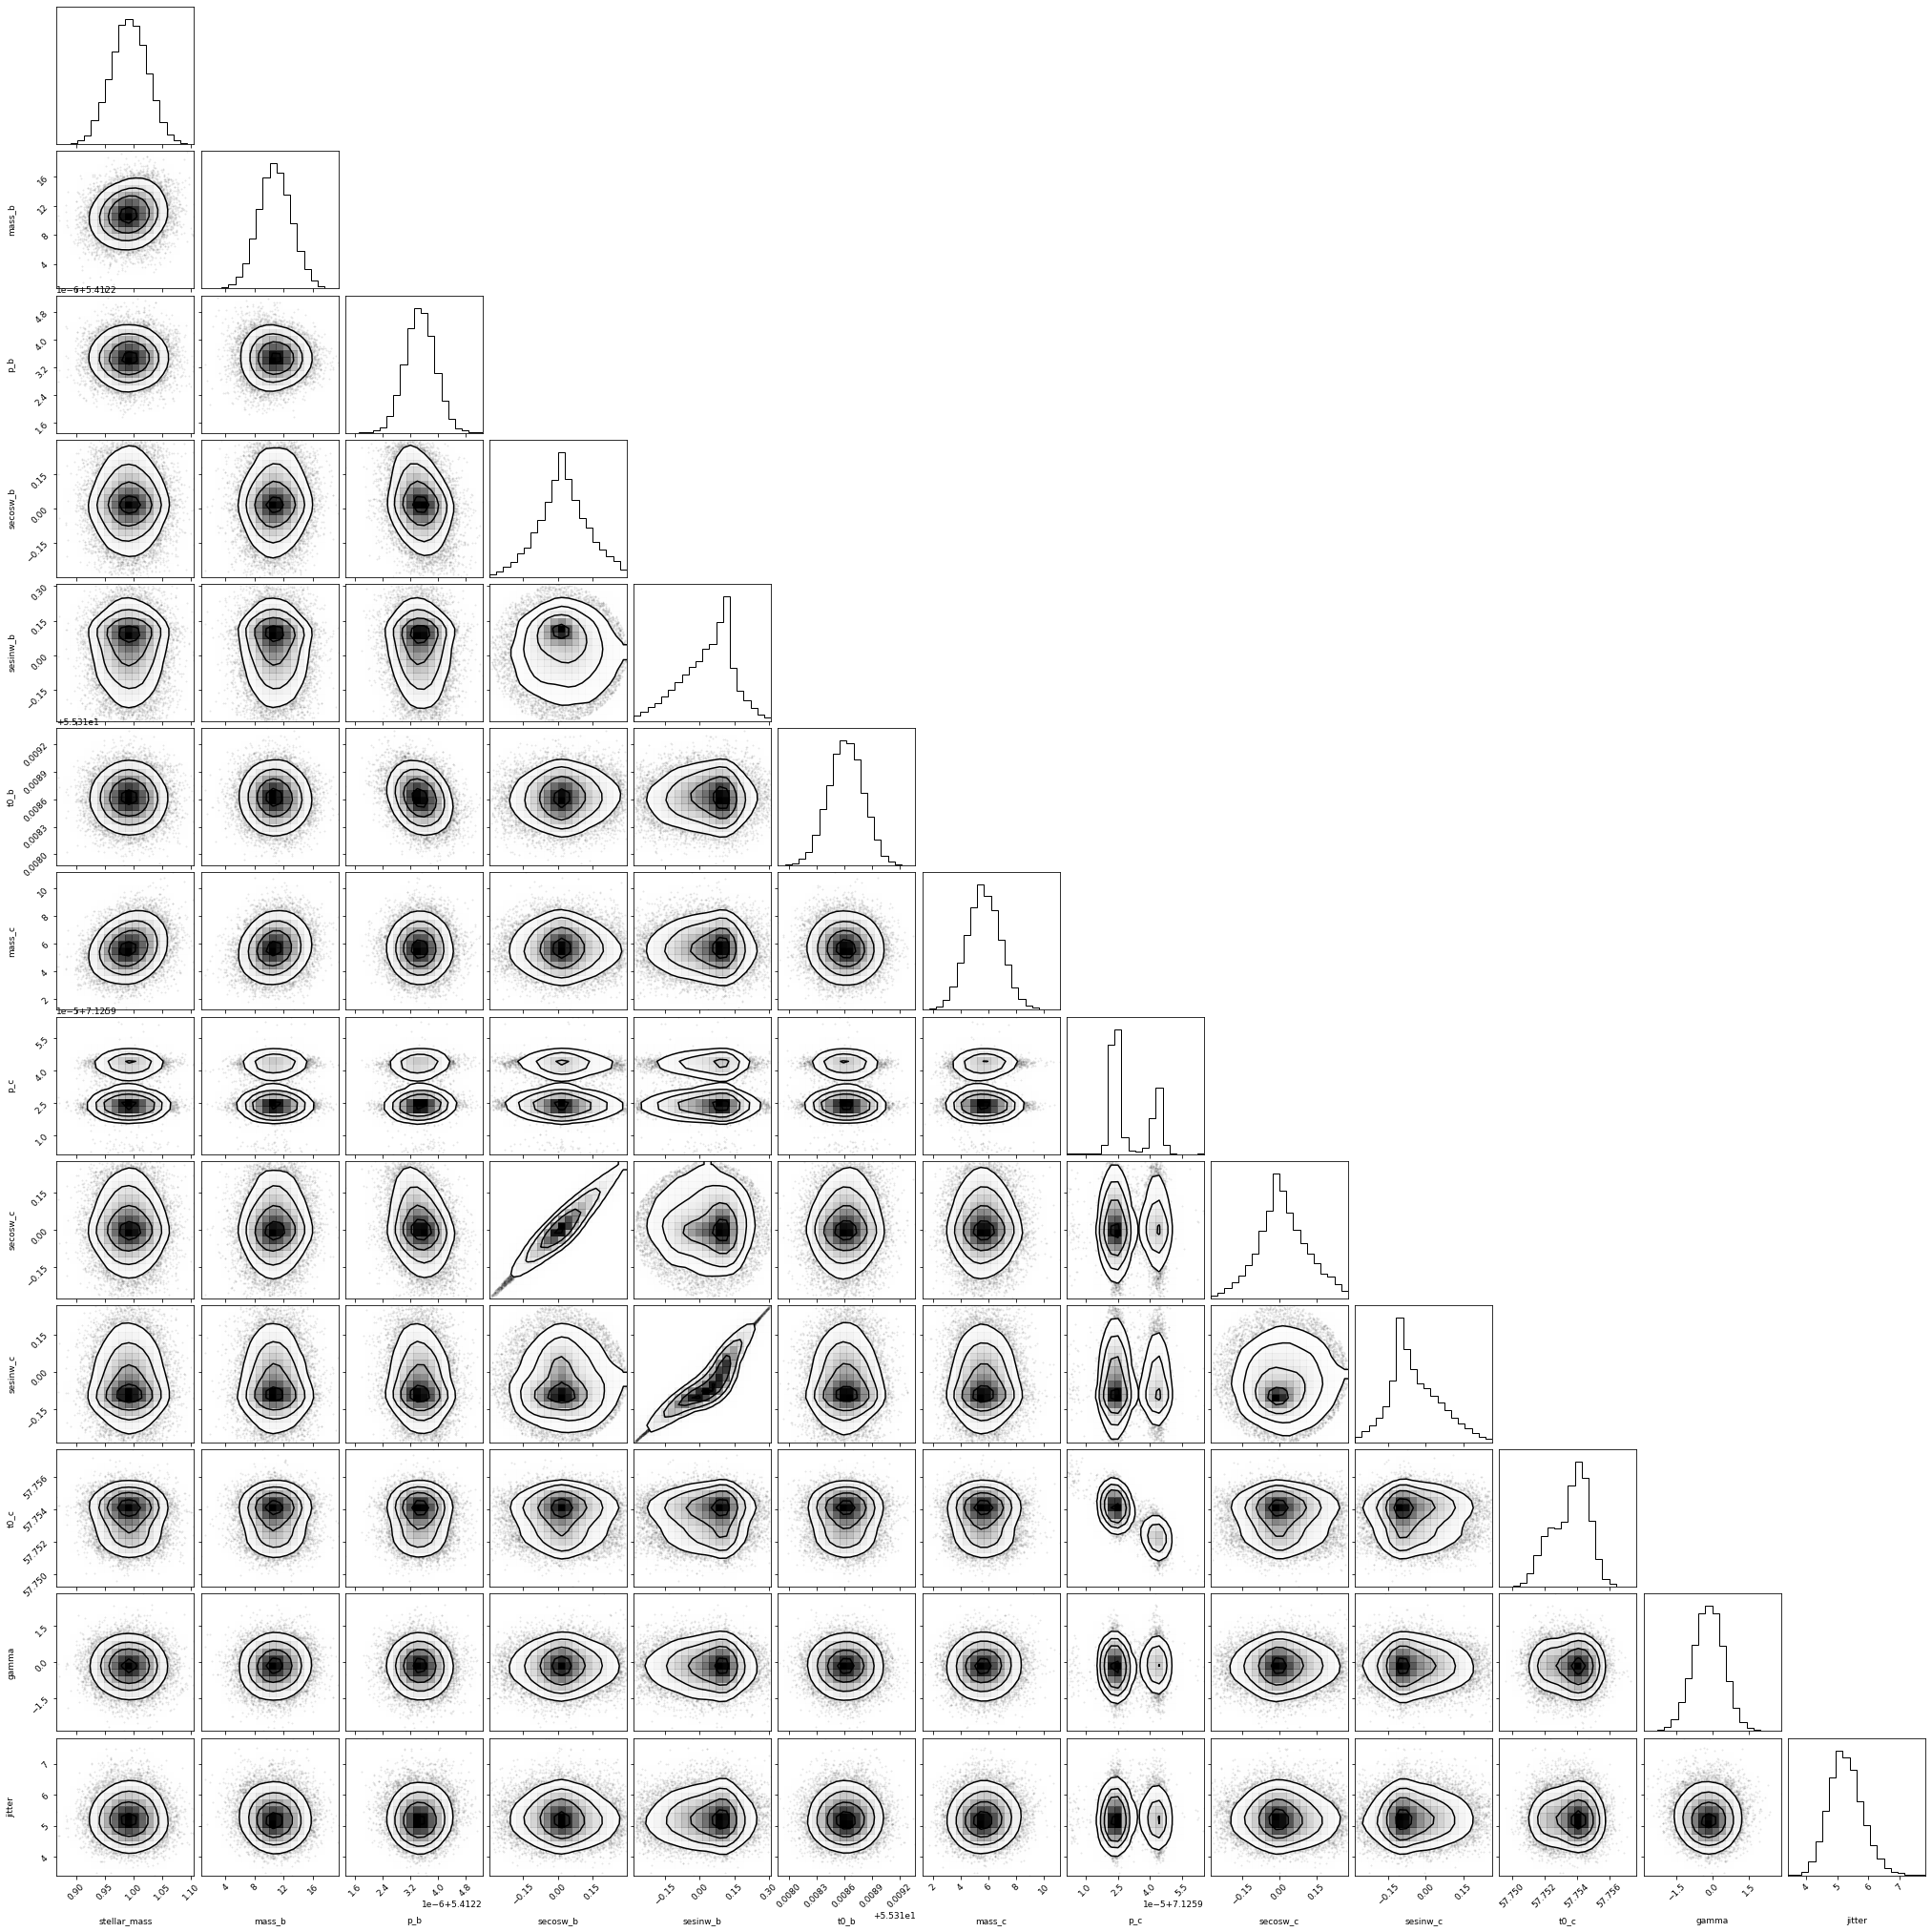

In [14]:
fig = corner.corner(
    flat_samples[::1000], labels=labels,smooth=True, plot_contours=True)

Median Mass value of Planet b = 10.8 Earth Masses
SD                            = 2.3 Earth Masses
Median Mass value of Planet c = 5.7 Earth Masses
SD                            = 1.2 Earth Masses


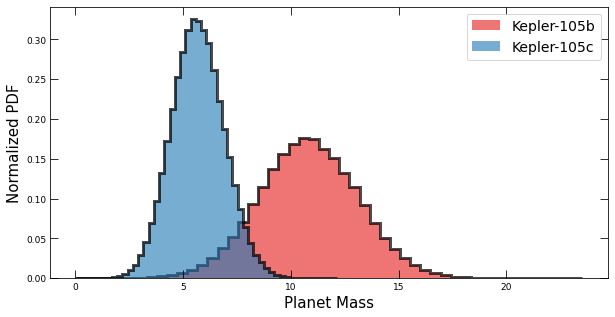

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
mass_b = flat_samples[:,1]
mass_c = flat_samples[:,6]
ax.hist(mass_b,bins=50,density=True,alpha=0.9,label='Kepler-105b', color='#EE6666')
ax.hist(mass_b,bins=50,density=True,alpha=0.7,histtype='step',color='k',lw=3)

ax.hist(mass_c,bins=50,density=True,alpha=0.6,histtype='stepfilled',label='Kepler-105c')
ax.hist(mass_c,bins=50, density=True,alpha=0.7,histtype='step',color='k',lw=3)

ax.set_xlabel('Planet Mass',fontsize=15)
ax.set_ylabel('Normalized PDF',fontsize=15)
ax.legend(prop={'size': 14})
ax.tick_params(direction='in',top=True,right=True,length=8);

print('Median Mass value of Planet b = {:0.1f}'.format(np.median(flat_samples[:,1])), 'Earth Masses')
print('SD                            = {:0.1f}'.format(np.std(flat_samples[:,1])), 'Earth Masses')

print('Median Mass value of Planet c = {:0.1f}'.format(np.median(flat_samples[:,6])), 'Earth Masses')
print('SD                            = {:0.1f}'.format(np.std(flat_samples[:,6])), 'Earth Masses')

In [16]:
import solve_for_masses as em
import mass_loss as ms
from numpy.random import normal
%matplotlib inline
import numpy as np

In [17]:
Xiron = 1./3.
Xice = 0.
Tkh_Myr=100.

In [18]:
K105s_M = 0.991 # stellar mass,  solar masses
K105s_Mer = np.sqrt(0.032**2.+0.033**2.) # stellar mass error, solar masses
K105s_Teff = 5933 # Stellar effective temperature, K
K105s_Teffer = 60 # stellar effective temperature error, K
K105s_R = 1.026 # stellar radius
K105s_Rer=np.sqrt(0.025**2.+0.024**2.) # stellar radius error, solar radii 
K105s_age= (10**9.63)/(10**6) # stellar age, Myr
K105s_age_er=1000. #stellar age error, Myr 

# radius in earth unit and period in days + errors for planet b
K105b_R = 2.531 
K105b_Rer = 0.068
K105b_P = 5.412207130
K105b_Per = 0.000002488 

#radius in earth unit and period in days + errors for planet c
K105c_R = 1.445
K105c_Rer = 0.044
K105c_P = 7.125945910
K105c_Per = 0.000012500

In [19]:
mass_c_evap= mass_c[::715]
mass_b_evap = mass_b[::715]

In [20]:
def min_mass_gaseous(p_rocky,p_gas,Tkh_scale_myr,Xiron,Xice,age_Myr,eff_option=3):
    # we wish to find the minimum mass for the gaseous planet given
    # the mass-loss time-scale for the rocky planet

    # the first thing we wish to do is actually check a solution exists
    # we do this by finding the maximum-mass loss timescale and checking it does
    # go above the one we want

    # first find the maximum core mass to check-up to (i.e. when 10% of the
    # planet's radius comes from the convective envelope)

    Rcore = p_gas.radius/1.1

    Mcore_max = ps.solid_radius_to_mass(Rcore,Xiron,Xice)

    input_args=[]
    input_args.append(p_gas.Teq)
    input_args.append(Tkh_scale_myr)
    input_args.append(Xiron)
    input_args.append(Xice)
    input_args.append(p_gas.radius*earth_radius_to_cm)
    input_args.append(age_Myr)
    input_args.append(p_gas.a)
    input_args.append(0.) # tmdot_want is zero for the maximisation
    input_args.append(eff_option)

    Mcore_min_try = 0.1 # just use 0.1 earth masses as this is not constrining
    # check solver will actually give a solution for this low a core-mass upto 1 Earth mass

    while Mcore_min_try < Mcore_max:

        sol = tmdot_gas_minimise(Mcore_min_try,input_args)
        if sol < 0.:
            Mcore_min_try += 0.1

            #print("Increased Mcore_min_try to:",Mcore_min_try, "Mcore_max = ", Mcore_max)
        else:
            if (1./sol < p_rocky.tmdot):
                # proceed with this lower bound
                break
            else:
                # solver cannot find a lower core mass that it can solve structure for
                # recommend trying a smaller increase in the min core mass
                # or if happening for 0.1 Mearth then this is a reasonable upper-limit
                if (Mcore_min_try != 0.1):
                    print("Error could not find suitable lower mass bound. Current bound is ", Mcore_min_try)

                #return -Mcore_min_try, -5
                return -5., -5

    if sol < 0.:
        # solver cannot find a suitable lower mass bound it can solve for
        print("ERROR - could not find a lower mass bound to solve from.")
        return -6., -6

In [21]:
planet_c = []
Mout_error= np.zeros(20000)
flag_out = np.zeros(20000,dtype=np.int8)

for i in range(20000):
    
    K105b_R_use = normal(K105b_R,K105b_Rer,1)
    K105b_P_use = normal(K105b_P,K105b_Per,1)
    
    K105c_R_use = normal(K105c_R,K105c_Rer,1)
    K105c_P_use = normal(K105c_P,K105c_Per,1)
    
    system = em.psystem('Kepler105_%d' %i)
    system.add_planet('105b',K105b_R_use,K105b_Rer,K105b_P_use,K105b_Per)
    system.add_planet('105c',K105c_R_use,K105c_Rer,K105c_P_use,K105c_Per)
    system.star.mass=normal(K105s_M,K105s_Mer,1)
    system.star.radius=normal(K105s_R,K105s_Rer,1)
    system.star.Teff=normal(K105s_Teff,K105s_Teffer,1)
    system.star.age = normal(K105s_age,K105s_age_er,1)
    system.update_planet_info()
    system.above_or_below_valley()
    system.planets[1].mass = mass_c_evap[i]
    planet_c.append(system.planets[1].mass)
    ms.find_hardest_rocky(system,Tkh_Myr,Xiron,Xice)

    Mout, flag = ms.min_mass_gaseous(system.planets[1],system.planets[0],Tkh_Myr,Xiron,Xice,system.star.age)
    
    Mout_error[i] = Mout
    flag_out[i]=flag

In [22]:
New_mout = Mout_error[np.where(flag_out == 1)]
print(np.median(New_mout))
np.std(New_mout)

8.670936382222425


2.331040087389559

No handles with labels found to put in legend.


Percentage of samples consistent with photoevaporation =  0.7493831133998498


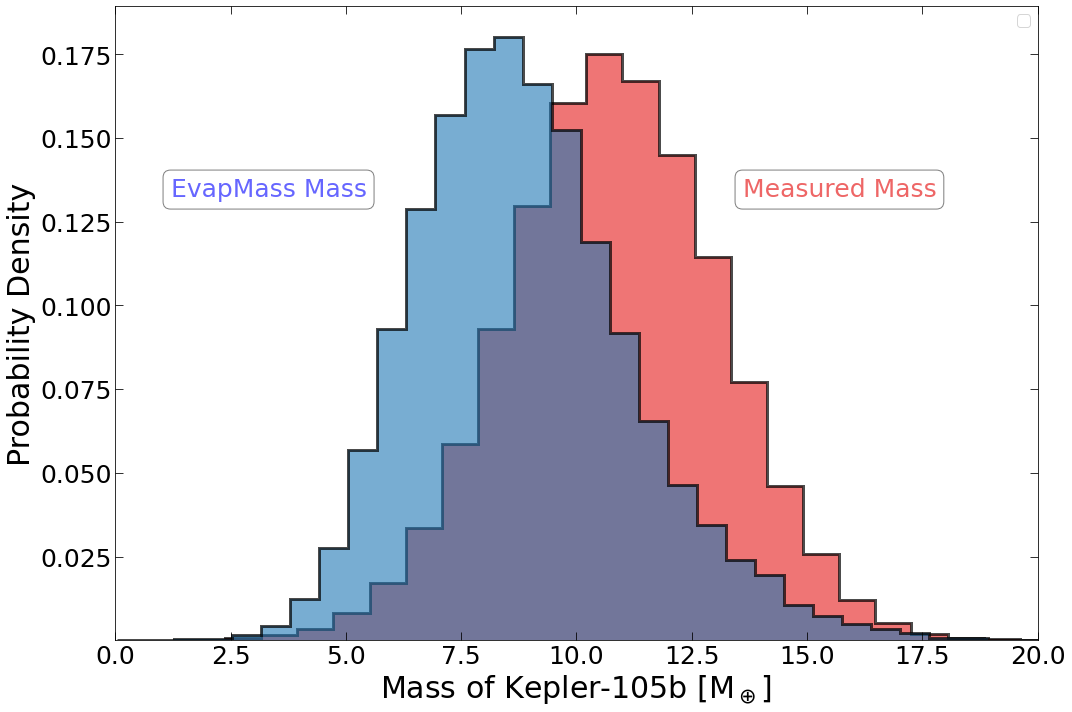

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(mass_b,bins=30,density=True,alpha=0.9, color='#EE6666')
ax.hist(mass_b,bins=30,density=True,alpha=0.7,histtype='step',color='k',lw=3)
ax.hist(New_mout,bins=30,density=True,alpha=0.6)
ax.hist(New_mout,bins=30,density=True,alpha=0.7,histtype='step',color='k',lw=3)
ax.set_xlabel('Mass of Kepler-105b [M$_\oplus$]',fontsize=30)
ax.set_ylabel('Probability Density',fontsize=30)
ax.legend(prop={'size': 16})
ax.tick_params(direction='in',top=True,right=True,length=8)
ax.tick_params(axis='x', labelsize=25 )
ax.tick_params(axis='y', labelsize=25 )
textstr = 'Measured Mass'
textstr2 = 'EvapMass Mass'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.15, 0.45, textstr, transform=ax.transAxes, fontsize=25,
        position=(0.68, 0.7), bbox=props, color='#EE6666')
ax.text(0.15, 0.45, textstr2, transform=ax.transAxes, fontsize=25,
        position=(0.06, 0.7), bbox=props, color='blue', alpha = 0.6)
ax.set_xlim(0,20)
ax.yaxis.set_ticks([0.025,0.050,0.075,0.10,0.125,0.150,0.175])
#ax.title.set_text('Measured and Predicted masses: Kepler-105b', fontsize = 22)

mass_b_comp = mass_b_evap[np.where(flag_out == 1)]
print('Percentage of samples consistent with photoevaporation = ', sum(mass_b_comp > New_mout)/len(mass_b_comp))
plt.tight_layout()
plt.savefig('histogram.png')